# import

In [1]:
root_folder = os.path.dirname(os.getcwd())
sys.path.insert(0, root_folder)
from cgc.geometry_correction import GeometryCorrection
import glob

import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import widgets, interact

# initialize object 

In [2]:
list_tiff = glob.glob('data/tiff/homogeneous*.tif')

# initialize object
o_cgc = GeometryCorrection(list_files=list_tiff)
o_cgc.load_files(notebook=True)

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=4), Label(value='Time remaining:', layout=Layout(width='10%')), Label(value=' >> calculating << ')))

## Display images

<IPython.core.display.Javascript object>


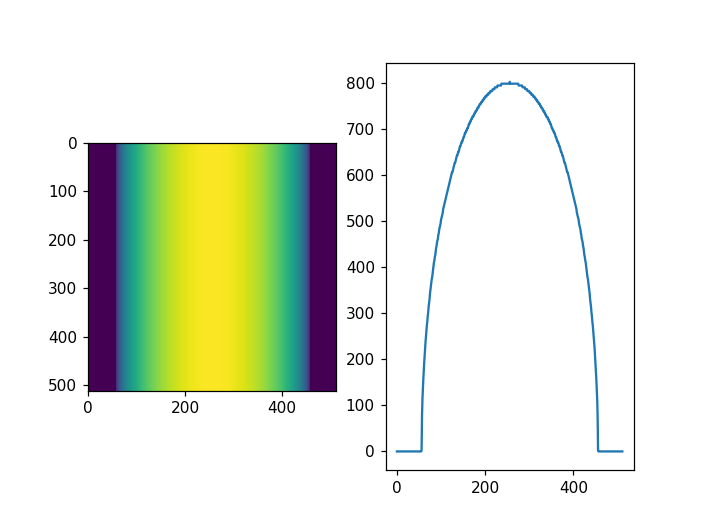

interactive(children=(IntSlider(value=0, description='index', max=3), Output()), _dom_classes=('widget-interact',))

<function __main__.plot>

In [3]:
list_images = o_cgc.list_data

fig1, (ax1, ax2) = plt.subplots(1, 2)
    
def plot(index):
    
    ax1.clear()
    ax1.imshow(list_images[index])
    
    ax2.clear()
    ax2.plot(list_images[index][0,:])
    
interact(plot,
        index = widgets.IntSlider(value=0,
                                max=len(list_images)-1),
                                continuous_update=False)

# Define parameters 

In [4]:
# center of cylinder
pixel_center = 256

# radius of cylinder
radius = 200

# define the parameters
o_cgc.define_parameters(radius1=radius, pixel_center=pixel_center)

# Run correction 

In [5]:
o_cgc.correct(notebook=True)

IntProgress(value=0, description='Progress:', max=4)

# Display data corrected 

<IPython.core.display.Javascript object>


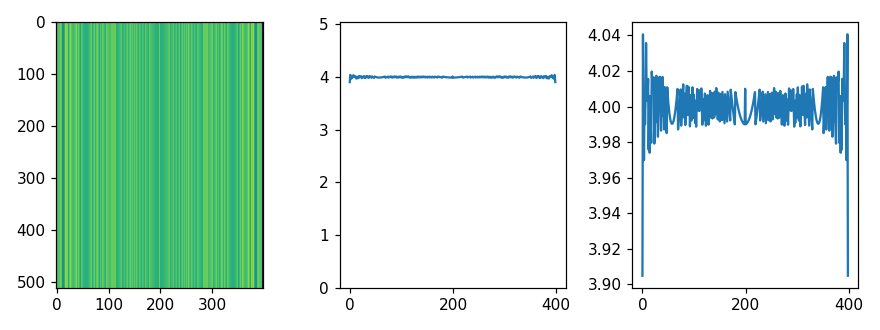

interactive(children=(IntSlider(value=0, description='index', max=3), Output()), _dom_classes=('widget-interact',))

<function __main__.plot>

In [6]:
list_images_corrected = o_cgc.list_data_corrected

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
    
def plot(index):
    
    ax1.clear()
    ax1.imshow(list_images_corrected[index])
    
    ax2.clear()
    max_y_value = np.nanmax(list_images_corrected[index][0, 1:])
    ax2.plot(list_images_corrected[index][0,:])
    ax2.set_ylim(0,max_y_value+1)
    
    ax3.clear()
    ax3.plot(list_images_corrected[index][0,:])
    
    plt.tight_layout()
    
interact(plot,
        index = widgets.IntSlider(value=0,
                                max=len(list_images_corrected)-1),
                                continuous_update=False)